# Case 1. Heart Disease Classification
**Neural Networks for Machine Learning Applications**<br>
06.02.2022<br>
G11 Aitalina Krivoshapkina, Wai Ning Wong, Nontanat Nutsati <br>
Metropolia University of Applied Sciences

## 1. Introduction

This report shows our approach to solving a binary classification problem - **predicting the presence of heart disease**, with a dense neural network.

It involves:
- how to preprocess the data (normalize and encode categories)
- how to make classification on imbalanced data
- how to split a dataset into train and test sets
- how to use the sequential model
- how to train and evaluate the models
- how to analyse results using numerical metrics and graphical plots

## 2. Setup

The following libraries and functions were used

In [59]:
import time
import pandas as pd
import tensorflow as tf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, losses, metrics, optimizers

## 3. Dataset

In [60]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/

Dataset is fetched from https://www.kaggle.com/alexteboul/heart-disease-health-indicators-dataset

In [61]:
raw = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


## 4. Preprocessing
No missing value. <br>
The label is 'HeartDiseasorAttack' and the rest are features. <br>
The data are splitted into 0.75 for training and 0.25 for testing.

In [62]:
target = raw['HeartDiseaseorAttack']
features = raw.drop('HeartDiseaseorAttack', axis = 1)
features.describe().T

,count,mean,std,min,25%,50%,75%,max
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0
Veggies,253680.0,0.811420,0.391175,0.0,1.0,1.0,1.0,1.0


In [63]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   HighBP             253680 non-null  float64
 1   HighChol           253680 non-null  float64
 2   CholCheck          253680 non-null  float64
 3   BMI                253680 non-null  float64
 4   Smoker             253680 non-null  float64
 5   Stroke             253680 non-null  float64
 6   Diabetes           253680 non-null  float64
 7   PhysActivity       253680 non-null  float64
 8   Fruits             253680 non-null  float64
 9   Veggies            253680 non-null  float64
 10  HvyAlcoholConsump  253680 non-null  float64
 11  AnyHealthcare      253680 non-null  float64
 12  NoDocbcCost        253680 non-null  float64
 13  GenHlth            253680 non-null  float64
 14  MentHlth           253680 non-null  float64
 15  PhysHlth           253680 non-null  float64
 16  Di

In [64]:
target.value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [65]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=11,train_size=0.75)
np.shape(X_train), np.shape(X_test)

((190260, 21), (63420, 21))

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 5. Modeling

Neural Network model with 2 layer. The input layer uses ReLU activation function and the output uses Sigmoid activation function. <br>
Optimizer is RMS. <br>
Loss function is Binary Crossentropy <br>
Metrics Setting for evaluation is Binary Accuracy.

In [67]:
normalize = layers.Normalization()
normalize.adapt(X_train)

def make_model():
    model = models.Sequential([
        normalize,
        layers.Dense(5, activation = 'relu'),
        layers.Dense(1, activation = 'sigmoid')
    ])
    
    
    model.compile(
        optimizer = optimizers.RMSprop(),
        loss = losses.BinaryCrossentropy(),
        metrics = metrics.BinaryAccuracy(name = 'acc')
    )
    
    return model
    
model = make_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_5 (Normalizati (None, 21)                43        
_________________________________________________________________
dense_11 (Dense)             (None, 5)                 110       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 6         
Total params: 159
Trainable params: 116
Non-trainable params: 43
_________________________________________________________________


## 6. Training
Go through the training set 20 times with the batch size of 128.
Spent 0.617 sec/epoch the total time is 12.34 sec.

In [68]:
EPOCHS = 20

t0 = time.time()
r = model.fit(
    X_train,
    y_train,
    epochs = EPOCHS,
    batch_size = 128,
    verbose = 0,
    )

t1 = time.time()
etime = t1 - t0
print(f'Total elapsed time {etime:.2f} s and {etime/EPOCHS:.3f} s/epoch')

Total elapsed time 14.19 s and 0.710 s/epoch


## 7. Performance and evaluation

In [69]:
epochs = r.epoch
loss = r.history['loss']
acc = r.history['acc']

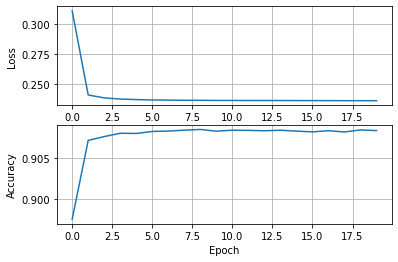

In [70]:
plt.subplot(2, 1, 1)
plt.plot(epochs, loss)
plt.grid()
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(epochs, acc)
plt.grid()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [71]:
print(f'Training loss = {loss[-1]:.3f}')
print(f'Training accuracy = {acc[-1]:.3f}')

Training loss = 0.236
Training accuracy = 0.908


In [72]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 0)
print(f'Test loss = {test_loss:.3f}')
print(f'Test accuracy = {test_acc:.3f}')

Test loss = 0.241
Test accuracy = 0.908


In [73]:
predictions = model.predict(X_train)
predictions = 1.0*(predictions >= 0.5)

In [74]:
cm = confusion_matrix(y_train, predictions)
print(cm)

[[171415    928]
 [ 16539   1378]]


In [75]:
tn, fp, fn, tp = confusion_matrix(y_train, predictions).ravel()
print('              Confusion matrix')
print(f'                 Prediction')
print(f'Diagnose  Healthy   Disease      SUM')
print(f'Healthy  {tn:8d}  {fp:8d} {tn+fp:8d}')
print(f'Disease  {fn:8d}  {tp:8d} {fn+tp:8d}')
print(f'SUM      {tn+fn:8d}  {fp+tp:8d} {tn+fp+fn+tp:8d}')

              Confusion matrix
                 Prediction
Diagnose  Healthy   Disease      SUM
Healthy    171415       928   172343
Disease     16539      1378    17917
SUM        187954      2306   190260


In [76]:
cr = classification_report(y_train, predictions, target_names = ['Healthy', 'Disease'])
print(cr)

              precision    recall  f1-score   support

     Healthy       0.91      0.99      0.95    172343
     Disease       0.60      0.08      0.14     17917

    accuracy                           0.91    190260
   macro avg       0.75      0.54      0.54    190260
weighted avg       0.88      0.91      0.87    190260



In [77]:
print(f'Precision for Healthy = {tn/(tn+fn):.2f}')
print(f'Precision for Disease = {tp/(fp+tp):.2f}')

Precision for Healthy = 0.91
Precision for Disease = 0.60


## 8. Discussion and conclusions

We've tried 2 to 4 layers, 4 to 6 neurons, higher and lower epochs and higher and lower batch sizes. From our observation, their accuracies don't have a significant different between each others. The accuracy is somewhere between 90.6/90.7. Our best model has 2 layers. Input and hidden layers use ReLU activation function and the output layer uses Sigmoid activation function. The training set is 75% and the test set is 25%. The result of this model is 0.907 accuracy and 0.241 with the testing set. Our main observation is that the imbalance of the data (The difference of the amount of healthy and disease in the data) may causes the model to stuck at 90.7% accuracy after the trial and error with other settings. So, maybe the model can be improved by adjusting the imbalance of the data in the future.